# Análisis de integridad de datos

## Autoría

* Autor: Jorge Cabrera Rodríguez
* Email: alu0101351773@ull.edu.es
* Fecha: 15/10/2023

## Estudio de coeficientes de correlación

Cargamos el conjunto de datos de "lagos.csv", que recoge datos de un estudio sobre la contaminación por mercurio en 53 lagos de Florida. Las variables observadas son:
-	LAKE: Nombre del lago
- SCALE_ALCAL: Nivel de alcalinidad (leve, moderada, alta, crítica)
-	ALCAL: Alcalinidad del agua (mg./l.)
-	PH: Acidez del agua
-	CALCIO: Calcio (mg./l.)
-	CLOROF: Clorofila (mg./l.)
-	AV_MER: Concentración media de mercurio en el tejido muscular de la muestra de peces del lago (partes por millón)
-	NUM_MUESTRA: Tamaño de la muestra de peces
-	MIN: Concentración mínima de mercurio en los peces de la muestra
-	MAX: Concentración máxima de mercurio en los peces de la muestra
-	STANDMER: Estimación de la concentración media de mercurio en los peces de la muestra
- HEALTH_RISK: Riesgo sanitario por el consumo de pescado (-1: Sin riesgo, 0: Riesgo potencial, 1: Riesgo efectivo)
-	AGEDATA: 1 si tenemos peces de 3 años o más, ó 0 si no los tenemos


1.Realizar un estudio de correlaciones de aquellas variales del dataset sobre las que se pueda llevar a cabo dicho estudio.

2.Realizar un estudio de la relación entre variables cualitativas (escoger un par de dichas variables, e.g. "scale_alcal" y "health_risk").

### Realizar un estudio de correlaciones de aquellas variales del dataset sobre las que se pueda llevar a cabo dicho estudio.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#!pip install rpy2==3.5.1
%load_ext rpy2.ipython

In [3]:
%%R
library(tidyverse)

data <- read.table(
    file = '/content/gdrive/My Drive/Colab Notebooks/Preprocesado de datos_2023_24/data/lagos.csv',
    sep = ';',
    header = TRUE
)
head(data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
    lake scale_alcal alcal  ph calcio clorof av_mer n_muest  min  max standmer
1 Alliga        mild   5.9 6.1    3.0    0.7   1.23       5 0.85 1.43     1.53
2  Annie        mild   3.5 5.1    1.9    3.2   1.33       7 0.92 1.90     1.33
3 Apopka        high 116.0 9.1   44.1  128.3   0.04       6 0.04 0.06     0.04
4 Blue C    moderate  39.4 6.9   16.4    3.5   0.44      12 0.13 0.84     0.44
5  Brick        mild   2.5 4.6    2.9    1.8   1.20      12 0.69 1.50     1.33
6 

Lo primero que tenemos que hacer es extraer del conjunto de datos todas aquellas variables cualitativas que no puedan ser correlacionadas, como son:

* `lake`
* `scale_alcal`
* `health_risk`
* `agedata`

In [4]:
%%R

numeric_data <- data %>%
    select(alcal, ph, calcio, clorof, av_mer, n_muest, min, max, standmer)

head(numeric_data)

  alcal  ph calcio clorof av_mer n_muest  min  max standmer
1   5.9 6.1    3.0    0.7   1.23       5 0.85 1.43     1.53
2   3.5 5.1    1.9    3.2   1.33       7 0.92 1.90     1.33
3 116.0 9.1   44.1  128.3   0.04       6 0.04 0.06     0.04
4  39.4 6.9   16.4    3.5   0.44      12 0.13 0.84     0.44
5   2.5 4.6    2.9    1.8   1.20      12 0.69 1.50     1.33
6  19.6 7.3    4.5   44.1   0.27      14 0.04 0.48     0.25


In [5]:
%%R

cathegorical_data <- data %>%
    select(scale_alcal, health_risk, agedata)

head(cathegorical_data)

  scale_alcal health_risk agedata
1        mild          -1       1
2        mild          -1       0
3        high           1       0
4    moderate          -1       0
5        mild          -1       1
6    moderate          -1       1


Una vez extraídos los valores numéricos del conjunto de datos, mostraremos en un gráfico sus diferentes valores, para observar sus distribuciones y preveer posibles valores altos o bajos de correlación.

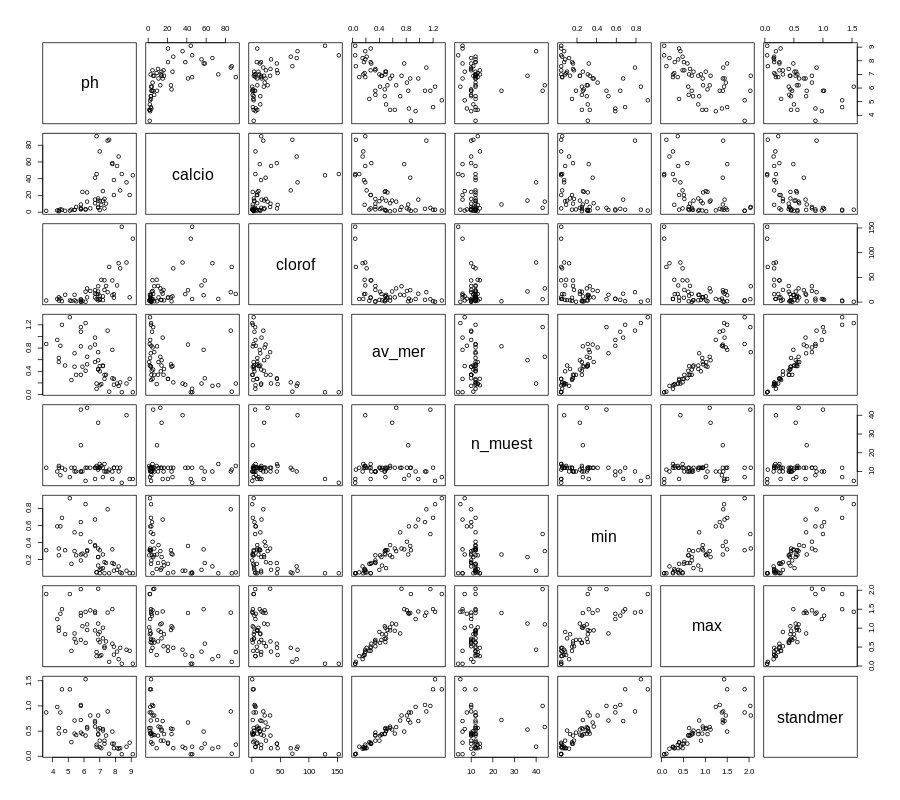

In [6]:
%%R -w 900 -h 800

plot(numeric_data[, -1])

Podemos observar correlación lineal alta entre variables como:
* `av_mer` con
    * `min`
    * `max`
    * `standmer`
Asimismo, se puede observar una muy débil distribución de puntos lineal entre las variables `ph` con `standmer`, de las que puede que se calcule una correlación de _pearson_ media entre ellas.

Pasando a la correlación de _Spearman_, se observan distribuciones continuas entre variables como `ph` y `calcio`, o `ph` y `clorof`, similares a funciones cuadráticas. También podemos ver este tipo de distribuciones de puntos en variables como `clorof` y `min`, donde vemos una relación ascendente similar a
una función racional.

In [7]:
%%R

data_cor <- cor(numeric_data[, -1], method = 'pearson')
data_cor

                  ph      calcio      clorof      av_mer     n_muest
ph        1.00000000  0.57713272  0.60848276 -0.57540012 -0.01860607
calcio    0.57713272  1.00000000  0.40991385 -0.40067958 -0.08937901
clorof    0.60848276  0.40991385  1.00000000 -0.49137481 -0.01182027
av_mer   -0.57540012 -0.40067958 -0.49137481  1.00000000  0.07903426
n_muest  -0.01860607 -0.08937901 -0.01182027  0.07903426  1.00000000
min      -0.54196524 -0.33247623 -0.40045856  0.92720506 -0.08165278
max      -0.55181523 -0.40791663 -0.48497215  0.91586397  0.16109174
standmer -0.61284905 -0.46440947 -0.50644193  0.95921481  0.02580046
                 min        max    standmer
ph       -0.54196524 -0.5518152 -0.61284905
calcio   -0.33247623 -0.4079166 -0.46440947
clorof   -0.40045856 -0.4849721 -0.50644193
av_mer    0.92720506  0.9158640  0.95921481
n_muest  -0.08165278  0.1610917  0.02580046
min       1.00000000  0.7653532  0.91908939
max       0.76535319  1.0000000  0.85975810
standmer  0.91908939  0.859

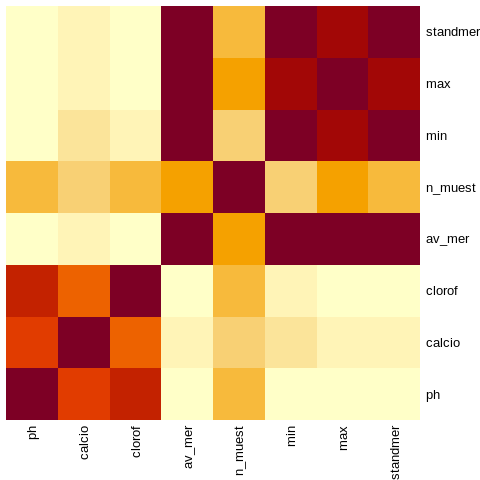

In [8]:
%%R

heatmap(
    data_cor,
    Rowv = NA,
    Colv = NA,
    scale = 'none',
)

Como comentamos anteriormente, podemos observar una correlación especialmente alta entre las variables `av_mer` frente a `min` y `max` (0.92 y 0.91 respectivamente), además de con la variable `standmer` (0.95).

Para analizar las variables con distribución continua no lineal, utilizaremos el coeficiente de _Spearman_.

In [9]:
%%R

data_cor <- cor(numeric_data[, -1], method = 'spearman')
data_cor

                 ph      calcio      clorof      av_mer     n_muest        min
ph        1.0000000  0.77238446  0.67426098 -0.63380966 -0.10657298 -0.6540428
calcio    0.7723845  1.00000000  0.49365762 -0.53654703 -0.06103213 -0.5365660
clorof    0.6742610  0.49365762  1.00000000 -0.44287761  0.04250279 -0.3847367
av_mer   -0.6338097 -0.53654703 -0.44287761  1.00000000 -0.06336727  0.9271856
n_muest  -0.1065730 -0.06103213  0.04250279 -0.06336727  1.00000000 -0.1909606
min      -0.6540428 -0.53656603 -0.38473669  0.92718564 -0.19096062  1.0000000
max      -0.5777209 -0.45977336 -0.42508521  0.95852836 -0.03156012  0.8663428
standmer -0.6792944 -0.58823296 -0.50958280  0.97237747 -0.04607296  0.9165424
                 max    standmer
ph       -0.57772093 -0.67929443
calcio   -0.45977336 -0.58823296
clorof   -0.42508521 -0.50958280
av_mer    0.95852836  0.97237747
n_muest  -0.03156012 -0.04607296
min       0.86634283  0.91654241
max       1.00000000  0.92582959
standmer  0.92582959  1.0

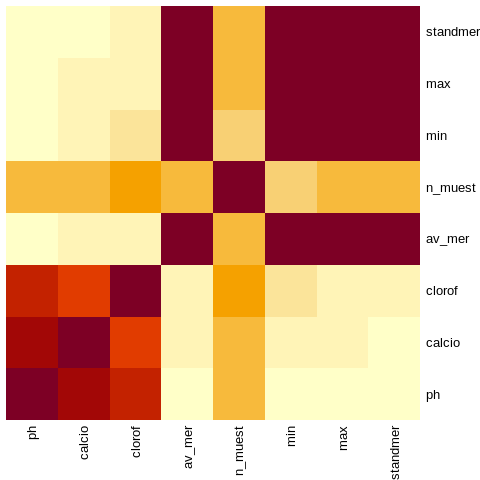

In [10]:
%%R

heatmap(
    data_cor,
    Rowv = NA,
    Colv = NA,
    scale = 'none',
)

En este caso, vemos que los valores de correlación son muy similares a los de _pearson_ pues en las distribuciones lineales suelen comportarse de manera similar.

También podemos detectar una correlación alta entre `ph`, `calcio` y `clorof` como se mencionó anteriormente. En este caso las correlaciones son mayores que en _pearson_, pues tiene en cuenta la "curvatura" de dichas variables.

### Realizar un estudio de la relación entre variables cualitativas (escoger un par de dichas variables, e.g. `scale_alcal` y `health_risk`).

En este caso, para ver la relación entre la variable cualitativas, aplicaremos la prueba **Chi-cuadrado** (_Chi-square_).

La prueba **Chi-cuadrado** se puede calcular únicamente entre pares de variables, por lo que debemos generar los siguientes conjuntos:

* (`scale_alcal`, `health_risk`)
* (`scale_alcal`, `agedata`)
* (`health_risk`, `agedata`)

In [11]:
%%R

tb1 <- table(cathegorical_data$scale_alcal, cathegorical_data$health_risk)
tb2 <- table(cathegorical_data$scale_alcal, cathegorical_data$agedata)
tb3 <- table(cathegorical_data$health_risk, cathegorical_data$agedata)

In [12]:
%%R

chisq.test(tb1)


	Pearson's Chi-squared test

data:  tb1
X-squared = 66.215, df = 6, p-value = 2.436e-12



En el caso de la pareja (`scale_alcal`, `health_risk`) contamos con un _p-valor_ extremadamente bajo, por lo que la confianza en la hipótesis de que sean ambas independientes. Por ende, rechazamos $H_0$ y decimos que ambas variables son
dependientes.

In [13]:
%%R

chisq.test(tb2)


	Pearson's Chi-squared test

data:  tb2
X-squared = 0.32504, df = 3, p-value = 0.9553



En el caso de la pareja (`scale_alcal`, `agedata`) contamos con un _p-valor_ alto, lo que confirma $H_0$, indicando que ambas variables son independientes.

In [14]:
%%R

chisq.test(tb3)


	Pearson's Chi-squared test

data:  tb3
X-squared = 0.23703, df = 2, p-value = 0.8882



Similar a la pareja anterior, la pareja (`health_risk`, `agedata`) cuentan con un _p-valor_ alto, lo que indica una alta confianza a que ambas variables sean independientes.

## Análisis de redundancia de registros

La tabla RLdata500 contiene datos personales artificales para la evaluación de los procedimientos de Record Linkage.

* fname_c1: First name, first component
* fname_c2: First name, second component
* lname_c1: Last name, first component
* lname_c2: Last name, second component
* by: Year of birth
* bm: Month of birth
* bd: Day of birth

In [15]:
%%R
install.packages('RecordLinkage', verbose = FALSE)

require('RecordLinkage')

data(RLdata10000)
head(RLdata10000)

(as ‘lib’ is unspecified)

















































	‘/tmp/RtmpB3SkzY/downloaded_packages’






Attaching package: ‘bit’



    symdiff



    xor



















Attaching package: ‘ff’



    write.csv, write.csv2



    is.factor, is.ordered





Attaching package: ‘RecordLinkage’



    clone



    isFALSE




  fname_c1 fname_c2   lname_c1 lname_c2   by bm bd
1    FRANK     <NA>    MUELLER     <NA> 1967  9 27
2   MARTIN     <NA>    SCHWARZ     <NA> 1967  2 17
3  HERBERT     <NA> ZIMMERMANN     <NA> 1961 11  6
4     HANS     <NA>    SCHMITT     <NA> 1945  8 14
5      UWE     <NA>     KELLER     <NA> 2000  7  5
6   DANIEL     <NA>   HEINRICH     <NA> 1967  5  6


In [33]:
%%R
# El codigo no se pudo copiar y pegar tal cual, porque en el notebook original
# la variable "dups" no habia sido creada por lo que daba un error de referencia
# He tenido deducir lo que hacia el codigo y hacer un codigo equivalente

# Union de base de datos con vector identidad
data <- cbind(RLdata10000, identity.RLdata10000)

# Guardado de IDs duplicados
duplicates <- data[duplicated(data$identity.RLdata10000) | duplicated(data$identity.RLdata10000, fromLast = TRUE), ]

# Filtrado de IDs duplicados
data <- subset(data, identity.RLdata10000 %in% duplicates$identity.RLdata10000)

# Ordenado
data <- data[order(data$identity.RLdata10000), ]

head(data)

     fname_c1 fname_c2  lname_c1 lname_c2   by bm bd identity.RLdata10000
2461     PAUL     <NA>  SCHAEFER     <NA> 1942  7  2                   20
3612     PAUL     <NA> SCHAECFER     <NA> 1942  7  2                   20
2306  HERBERT     <NA>  ALBRECHT     <NA> 1985 12  8                   39
3265  HERBERT     <NA>  ALBRECHT     <NA> 1985 12 15                   39
1193   MARKUS  HARTMUT   NEUMANN     <NA> 1948  7 31                   44
3277  MARKGUS  HARTMUT   NEUMANN     <NA> 1948  7 31                   44


### Crear el vector de comparación para pares aplicado a RLdata500 con bloqueo en las variables (`by`,`bm`), en (`bm`,`bd`) y en (`by`,`bd`).

In [34]:
%%R

pairs = compare.dedup(
    RLdata10000,
    identity = identity.RLdata10000,
    blockfld = list(c(5,6),c(6,7),c(5,7))
)

print(head(pairs$pairs))

  id1 id2 fname_c1 fname_c2 lname_c1 lname_c2 by bm bd is_match
1   1 119        0       NA        0       NA  1  0  1        0
2   1 235        0       NA        0       NA  0  1  1        0
3   1 727        0       NA        0       NA  1  1  0        0
4   1 729        0       NA        0       NA  1  0  1        0
5   1 791        0       NA        0       NA  0  1  1        0
6   1 902        0       NA        0       NA  0  1  1        0


### Calcula los posibles duplicados aplicando el modelo _Fellegi-Sunter_

In [35]:
%%R

pairs.w <- emWeights(pairs, cutoff = 0.8)
summary(pairs.w)



Deduplication Data Set

10000 records 
207005 record pairs 

994 matches
206011 non-matches
0 pairs with unknown status


Weight distribution:

[-250,-240] (-240,-230] (-230,-220] (-220,-210] (-210,-200] (-200,-190] 
         19      154403          46        2295           0           0 
(-190,-180] (-180,-170] (-170,-160] (-160,-150] (-150,-140] (-140,-130] 
          0           0           0           0           0           0 
(-130,-120] (-120,-110] (-110,-100]  (-100,-90]   (-90,-80]   (-80,-70] 
          0           0           0           0           0           0 
  (-70,-60]   (-60,-50]   (-50,-40]   (-40,-30]   (-30,-20]   (-20,-10] 
          0           0           0           0           0           0 
    (-10,0]      (0,10]     (10,20] 
          0           0       50232 


In [36]:
%%R

threshold<-optimalThreshold(pairs.w)
threshold
# classify remaining data
summary(emClassify(pairs.w,threshold))


Deduplication Data Set

10000 records 
207005 record pairs 

994 matches
206011 non-matches
0 pairs with unknown status


Weight distribution:

[-250,-240] (-240,-230] (-230,-220] (-220,-210] (-210,-200] (-200,-190] 
         19      154403          46        2295           0           0 
(-190,-180] (-180,-170] (-170,-160] (-160,-150] (-150,-140] (-140,-130] 
          0           0           0           0           0           0 
(-130,-120] (-120,-110] (-110,-100]  (-100,-90]   (-90,-80]   (-80,-70] 
          0           0           0           0           0           0 
  (-70,-60]   (-60,-50]   (-50,-40]   (-40,-30]   (-30,-20]   (-20,-10] 
          0           0           0           0           0           0 
    (-10,0]      (0,10]     (10,20] 
          0           0       50232 

510 links detected 
0 possible links detected 
206495 non-links detected 

alpha error: 0.997988
beta error: 0.002466
accuracy: 0.992754


Classification table:

           classification
true sta